In [1]:
import pandas as pd

df = pd.read_csv("magnetism.csv")
df

,Timestamp,Elapsed time (minutes),Set B field (T),B field (T),Ramp speed (T/min),Voltage (V),Inner Lower Temperature,Outer Lower Temperature,Inner Upper Temperature,Outer Upper Temperature,1st Stage Temperature,Shield Temperature,2nd Stage Temperature,Magnetism_ID
0,02/08/2019 03:27:38 PM,2.805300,0.0,0.00000,0.000000,0.0,281.797983,285.092215,280.715422,283.969736,145.612162,279.920378,204.958080,./T10/20190208_SMS.txt
1,02/08/2019 03:28:01 PM,3.175539,0.0,0.00000,0.000000,0.0,281.768245,285.065814,280.686698,283.941646,145.521580,279.884569,204.900535,./T10/20190208_SMS.txt
2,02/08/2019 03:28:23 PM,3.554124,0.0,0.00000,0.000000,0.0,281.737322,285.041573,280.652349,283.915624,145.428632,279.849350,204.839601,./T10/20190208_SMS.txt
3,02/08/2019 03:28:46 PM,3.933961,0.0,0.00000,0.000000,0.0,281.704371,285.016645,280.621349,283.886878,145.337971,279.809776,204.778354,./T10/20190208_SMS.txt
4,02/08/2019 03:29:09 PM,4.314683,0.0,0.00000,0.000000,0.0,281.673613,284.987751,280.583256,283.856319,145.245554,279.771382,204.720981,./T10/20190208_SMS.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789982,03/20/2019 10:24:29 AM,9833.385706,0.0,-0.00000,0.006867,0.0,5.073398,5.019095,4.877788,4.965012,41.333217,63.687044,3.241164,././T10/20190313_SMS.txt
2789983,03/20/2019 10:24:35 AM,9833.491933,0.0,-0.00426,0.006867,0.0,5.071438,5.017297,4.876068,4.963015,41.332443,63.700309,3.242243,././T10/20190313_SMS.txt
2789984,03/20/2019 10:24:42 AM,9833.604840,0.0,-0.00000,0.006867,0.0,5.069822,5.015468,4.874303,4.960119,41.331908,63.710247,3.248909,././T10/20190313_SMS.txt
2789985,03/20/2019 10:24:48 AM,9833.707356,0.0,-0.00000,0.006867,0.0,5.068294,5.013746,4.872636,4.958283,41.331908,63.720780,3.325273,././T10/20190313_SMS.txt


In [2]:
import pandas as pd
from darts import TimeSeries

# Assuming 'your_dataset.csv' is a string containing the dataset

# df = pd.read_csv(pd.compat.StringIO('your_dataset.csv'))

# Convert the 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

time_series_list = []
for ccr_id, group in df.groupby('Magnetism_ID'):
    # Sort the group by 'Timestamp' if not already sorted
    group.sort_values('Timestamp', inplace=True)
    
    # Set the 'Timestamp' column as the index
    group.set_index('Timestamp', inplace=True)
    
    # Exclude the 'CCR_ID' column from numeric conversion and resampling
    value_cols = ['Elapsed time (minutes)', 'Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)', 'Inner Lower Temperature', 'Outer Lower Temperature', 'Inner Upper Temperature', 'Outer Upper Temperature', '1st Stage Temperature', 'Shield Temperature', '2nd Stage Temperature', ]
    # value_cols = ['Elapsed time (minutes)','Setpoint (K)','Sensor A (K)','Sensor B (K)', 'Heater Output % (0-100)', 'Heater Range (integer 0-5)', 'Slope','Intercept','Sensor C (K) or sensor A (sensor unit)','Sensor D (K) or sensor B (sensor unit)']
    
    # Convert the numeric columns to numeric format, handling non-numeric values as NaN
    for col in value_cols:
        group[col] = pd.to_numeric(group[col], errors='coerce')
    
    # Select only numeric columns for resampling
    numeric_cols = group.select_dtypes(include='number').columns
    
    # Resample the numeric columns to a fixed frequency
    group_resampled = group[numeric_cols].resample('1T').mean()  # Adjust '5S' to the desired frequency
    
    # Handle missing values if necessary
    group_resampled = group_resampled.fillna(method='ffill')  # Forward fill missing values, or choose another appropriate method
    
    # Convert the resampled DataFrame to a Darts TimeSeries object
    time_series = TimeSeries.from_dataframe(group_resampled, value_cols=value_cols)
    
    time_series_list.append(time_series)


/tmp/ipykernel_949605/2093529370.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [3]:
print(time_series_list[0])

<TimeSeries (DataArray) (Timestamp: 14590, component: 12, sample: 1)>
array([[[3.61954000e-01],
        [0.00000000e+00],
        [2.92750000e-03],
        ...,
        [4.17271840e+01],
        [6.11838142e+01],
        [3.33105675e+00]],

       [[1.06804011e+00],
        [0.00000000e+00],
        [2.64000000e-03],
        ...,
        [4.17078789e+01],
        [6.12136258e+01],
        [3.28302967e+00]],

       [[2.04189467e+00],
        [0.00000000e+00],
        [3.62777778e-03],
        ...,
...
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.45878679e+04],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.45887758e+04],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]]])
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 201

In [4]:
print(len(time_series_list))

31


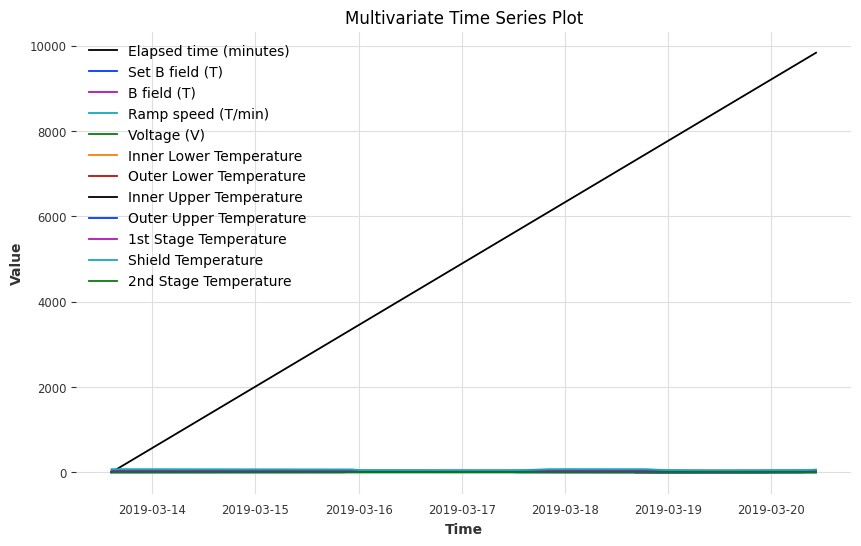

In [5]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
df = (time_series_list[1]).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Time Series Plot')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# fix python path if working locally
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
)
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

2023-07-27 08:58:58 darts.models WARNING: The statsforecast module could not be imported. To enable support for the StatsForecastAutoARIMA, StatsForecastAutoETS and Croston models, please consider installing it.


In [7]:
len(time_series_list[0])

14590

In [8]:
time_series_list_scaled = []

for time_series in time_series_list:
    scaler = Scaler()
    time_series_list_scaled.append(scaler.fit_transform(time_series))

In [9]:
# print(time_series_list_scaled[0].columns)
from darts import TimeSeries
temp = []
# Assuming you have a Darts TimeSeries object named 'ts'

# Convert the TimeSeries to a pandas DataFrame
for ts in time_series_list_scaled:
    df = ts.pd_dataframe()

    # Rename the columns in the pandas DataFrame
    new_column_names = ['Normalized Elapsed time (minutes)', 'Normalized Set B field (T)', 'Normalized B field (T)',
       'Normalized Ramp speed (T/min)', 'Normalized Voltage (V)', 'Normalized Inner Lower Temperature',
       'Normalized Outer Lower Temperature', 'Normalized Inner Upper Temperature',
       'Normalized Outer Upper Temperature', 'Normalized 1st Stage Temperature',
       'Normalized Shield Temperature', 'Normalized 2nd Stage Temperature']  # Replace with the new column names you want
    df.columns = new_column_names

    # Convert the modified pandas DataFrame back to a Darts TimeSeries
    temp.append(TimeSeries.from_dataframe(df))
time_series_list_scaled = temp
print(time_series_list_scaled[0].columns)

Index(['Normalized Elapsed time (minutes)', 'Normalized Set B field (T)',
       'Normalized B field (T)', 'Normalized Ramp speed (T/min)',
       'Normalized Voltage (V)', 'Normalized Inner Lower Temperature',
       'Normalized Outer Lower Temperature',
       'Normalized Inner Upper Temperature',
       'Normalized Outer Upper Temperature',
       'Normalized 1st Stage Temperature', 'Normalized Shield Temperature',
       'Normalized 2nd Stage Temperature'],
      dtype='object', name='component')


In [10]:
print((time_series_list[0]).columns)

Index(['Elapsed time (minutes)', 'Set B field (T)', 'B field (T)',
       'Ramp speed (T/min)', 'Voltage (V)', 'Inner Lower Temperature',
       'Outer Lower Temperature', 'Inner Upper Temperature',
       'Outer Upper Temperature', '1st Stage Temperature',
       'Shield Temperature', '2nd Stage Temperature'],
      dtype='object', name='component')


In [11]:
from darts import TimeSeries

covariates = []
for i in range(len(time_series_list)):
    ts_df = (time_series_list[i]).pd_dataframe()
    columns_to_keep = ['Set B field (T)', 'Elapsed time (minutes)', 'Ramp speed (T/min)', 'Inner Lower Temperature', 
                       'Outer Lower Temperature', 'Inner Upper Temperature',
                       'Outer Upper Temperature', '1st Stage Temperature',
                       'Shield Temperature', '2nd Stage Temperature']
    covariate_ts_df = ts_df[columns_to_keep]
    covariates.append(TimeSeries.from_dataframe(covariate_ts_df))


In [12]:
updated_covariates = []
for i in range(len(covariates)):
    df = covariates[i].pd_dataframe()
    # for time_series in time_series_list_scaled:
    temp = time_series_list_scaled[i].pd_dataframe()
    for col in temp.columns:
        df[col] = temp[col]
    updated_covariates.append(TimeSeries.from_dataframe(df))
    
print(updated_covariates[0].columns)
covariates = updated_covariates

Index(['Set B field (T)', 'Elapsed time (minutes)', 'Ramp speed (T/min)',
       'Inner Lower Temperature', 'Outer Lower Temperature',
       'Inner Upper Temperature', 'Outer Upper Temperature',
       '1st Stage Temperature', 'Shield Temperature', '2nd Stage Temperature',
       'Normalized Elapsed time (minutes)', 'Normalized Set B field (T)',
       'Normalized B field (T)', 'Normalized Ramp speed (T/min)',
       'Normalized Voltage (V)', 'Normalized Inner Lower Temperature',
       'Normalized Outer Lower Temperature',
       'Normalized Inner Upper Temperature',
       'Normalized Outer Upper Temperature',
       'Normalized 1st Stage Temperature', 'Normalized Shield Temperature',
       'Normalized 2nd Stage Temperature'],
      dtype='object', name='component')


In [49]:
from darts import TimeSeries

# ts_df = ts.pd_dataframe()
time_final = []
for i in range(len(time_series_list)):
    ts_df = (time_series_list[i]).pd_dataframe()
    columns_to_keep = ['B field (T)', 'Voltage (V)', ]
    covariate_ts_df = ts_df[columns_to_keep]
    time_final.append(TimeSeries.from_dataframe(covariate_ts_df))
    
print(len(time_final[0].columns))

2


In [60]:
model = TransformerModel(
    input_chunk_length=50,
    output_chunk_length=10,
    model_name="test5",
    activation="relu",
    # random_state=42,
    save_checkpoints=True,
    # force_reset=True,
    pl_trainer_kwargs = {"accelerator": "gpu", "devices": [1]}
)

train, test = [], []


for time_series in time_final:
    train_length = int(len(time_series) * 0.8)
    train.append(time_series[:train_length])
    test.append(time_series[train_length:])

# forecast = model.predict(len(val_series))

In [61]:
print(len(train[0]))
print(len(covariates[0]))

11672
14590


In [62]:
# model = TransformerModel.load('fourth.pth')
model.fit(
    series=train,
    past_covariates=covariates,
);

Training: 0it [00:00, ?it/s]

In [63]:
model.save('fifth.pth')

In [65]:
# fix python path if working locally
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
)
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

loaded_model = TCNModel.load('fifth.pth')

In [110]:
len(test[0])

2918

In [88]:
num = 0

In [111]:
n_forecast = len(test[num][500:700])  # Replace `test` with your test set
pred_series = loaded_model.predict(n=n_forecast, series=train[num], past_covariates = covariates[num])  # Adjust the `n` parameter as needed

Predicting: 0it [00:00, ?it/s]

In [112]:
from darts.metrics import mape, rmse

mape_score = mape(pred_series, test[num][500:700])  # Replace `test` with your true future values
rmse_score = rmse(pred_series, test[num][500:700])  # Replace `test` with your true future values

print(f"MAPE: {mape_score:.2f}%")
print(f"RMSE: {rmse_score:.2f}")

MAPE: nan%
RMSE: nan


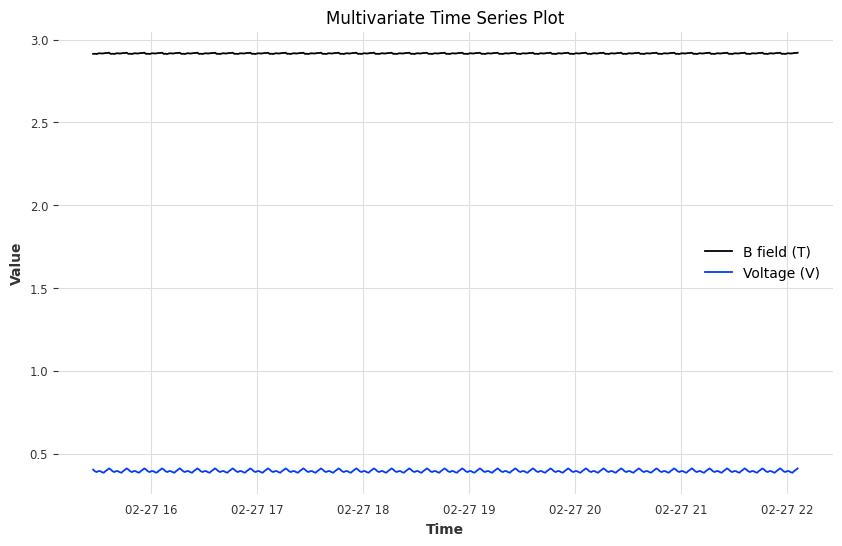

In [105]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
df = (pred_series).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Time Series Plot')
plt.legend()
plt.grid(True)
plt.show()


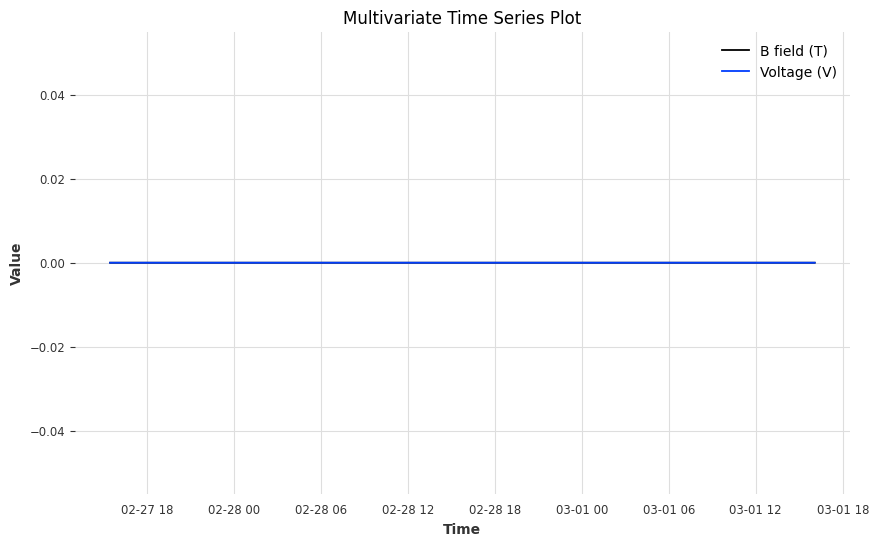

In [109]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
df = (test[num]).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Time Series Plot')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Assuming you have already trained your model and have a Darts TimeSeriesModel named 'model'
training_loss_history = loaded_model.history['train_loss']
training_accuracy_history = loaded_model.history['train_accuracy']

AttributeError: 'TransformerModel' object has no attribute 'history'